In [32]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from skimage import color
from PIL import Image

from dataset import read_datasets

In [2]:
persons = read_datasets()

04 04 2017 16:29:38 dataset.py[line:69] INFO Processing P1  - G1 
04 04 2017 16:29:38 dataset.py[line:69] INFO Processing P10 - G8 
04 04 2017 16:29:38 dataset.py[line:69] INFO Processing P12 - G6 
04 04 2017 16:29:38 dataset.py[line:69] INFO Processing P14 - G4 
04 04 2017 16:29:38 dataset.py[line:69] INFO Processing P3  - G2 
04 04 2017 16:29:38 dataset.py[line:69] INFO Processing P5  - G1 
04 04 2017 16:29:38 dataset.py[line:69] INFO Processing P6  - G8 
04 04 2017 16:29:38 dataset.py[line:69] INFO Processing P8  - G6 
04 04 2017 16:29:40 dataset.py[line:69] INFO Processing P6  - G9 
04 04 2017 16:29:40 dataset.py[line:69] INFO Processing P5  - G10
04 04 2017 16:29:40 dataset.py[line:69] INFO Processing P1  - G10
04 04 2017 16:29:40 dataset.py[line:69] INFO Processing P3  - G3 
04 04 2017 16:29:40 dataset.py[line:69] INFO Processing P12 - G7 
04 04 2017 16:29:40 dataset.py[line:69] INFO Processing P10 - G9 
04 04 2017 16:29:40 dataset.py[line:69] INFO Processing P8  - G7 
04 04 2017

In [6]:
rgb_data = persons['P9']['G9'][1]['rgb']
depth_png = persons['P9']['G9'][1]['depth_png']
depth_data = persons['P9']['G9'][1]['depth']
lm_data = persons['P9']['G9'][1]['lm']

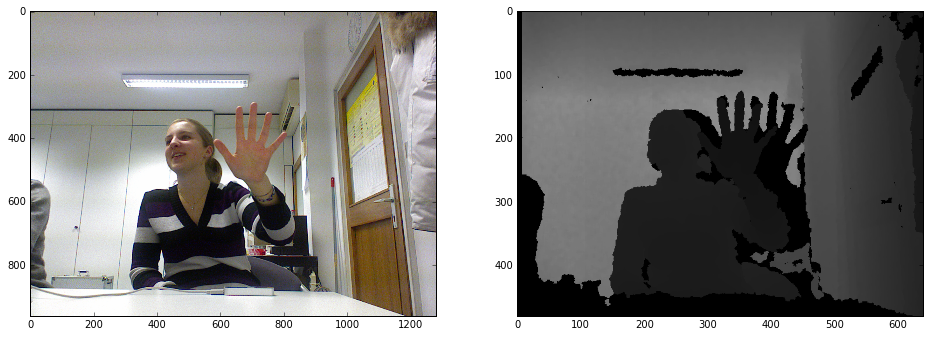

In [7]:
plt.figure(figsize=(16, 12))
fig = plt.subplot(121)
fig.imshow(rgb_data)
fig = plt.subplot(122)
fig.imshow(depth_png, cmap='gray')

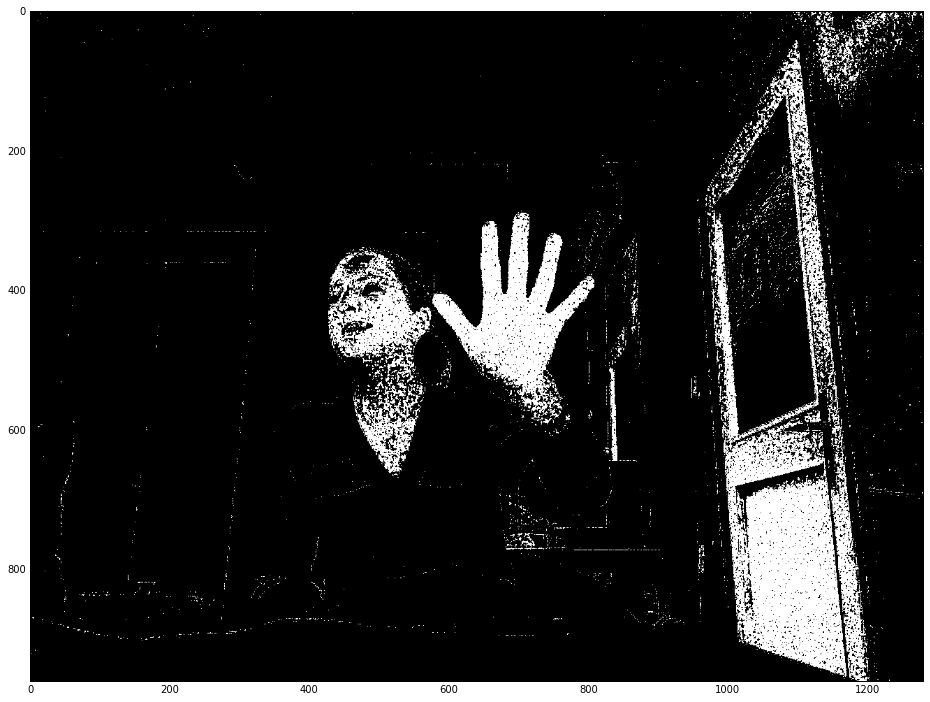

In [61]:
ycbcr = np.array(Image.fromarray(rgb_data).convert('YCbCr'))

H, W = rgb_data.shape[:2]

@np.vectorize
def is_skin_region(y, cb, cr):
    return 60 <= y <= 255 and 80 <= cb <= 120 and 140 <= cr <= 173

wbs = np.zeros((H, W))
cond_y = np.logical_and(ycbcr[:,:,0] >= 60, ycbcr[:,:,0] <= 255)
cond_cb = np.logical_and(ycbcr[:,:,1] >= 80, ycbcr[:,:,1] <= 120)
cond_cr = np.logical_and(ycbcr[:,:,2] >= 140, ycbcr[:,:,2] <= 173)
wbs[np.where(cond_y & cond_cb & cond_cr)] = 1

plt.figure(figsize=(16, 12))
plt.imshow(wbs, cmap='gray')